# Task 2
### Oasis Infobyte Data Science Internship
#### Unemployment Analysis With Python
##### Tridib Dalui

In [95]:
import numpy as np
import pandas as pd

import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
%matplotlib inline

#### reading the dataset

In [96]:
df=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [97]:
df.sample(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
256,Uttarakhand,31-10-2020,M,9.23,2739309,34.03,North,30.0668,79.0193
23,Bihar,30-04-2020,M,46.64,16046236,38.17,East,25.0961,85.3131
77,Haryana,31-08-2020,M,33.50,7113788,47.32,North,29.0588,76.0856
58,Goa,30-09-2020,M,15.38,425004,38.89,West,15.2993,74.1240
233,Tripura,31-07-2020,M,18.24,1348849,50.78,Northeast,23.9408,91.9882
127,Kerala,30-09-2020,M,5.91,9240913,34.60,South,10.8505,76.2711
246,Uttar Pradesh,31-10-2020,M,3.75,56539521,35.49,North,26.8467,80.9462
66,Gujarat,31-07-2020,M,1.84,24276120,46.41,West,22.2587,71.1924
213,Tamil Nadu,31-07-2020,M,6.81,24572827,40.13,South,11.1271,78.6569
53,Goa,30-04-2020,M,13.31,500614,44.97,West,15.2993,74.1240


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [99]:
df.shape

(267, 9)

In [100]:
# checking for Null

df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [101]:
#dropping the null values

df=df.dropna()

In [102]:
# check for duplicate columns

df.duplicated().sum()

0

In [103]:
#for statistical values

df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [104]:
#to print the columns

df.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","region", "longitude", "latitude"]

In [105]:
# to print the state with highest unemployment

print("state with most unemployment :- ",df['state'].value_counts().idxmax())

state with most unemployment :-  Andhra Pradesh


In [106]:
# to print the state with lowest unemployment

print("state with least unemployment :- ",df['state'].value_counts().idxmin())

state with least unemployment :-  Sikkim


In [107]:
# to print the part of india with highest unemployment

print("Indian Region with most unemployment :- ",df['region'].value_counts().idxmax())

Indian Region with most unemployment :-  North


In [108]:
# to print the part of india with least unemployment

print("Indian Region with least unemployment :- ",df['region'].value_counts().idxmin())

Indian Region with least unemployment :-  Northeast


In [109]:
#to print the month of unemployment

import datetime as dt
import calendar

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['month_int'] =  df['date'].dt.month
df['month'] =  df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [110]:
#to print the months with highest unemployment

print("month with highest unemployment :- ",df['month'].value_counts().idxmax())

month with highest unemployment :-  Mar


In [111]:
#to print the months with least unemployment

print("month with least unemployment :- ",df['month'].value_counts().idxmin())

month with least unemployment :-  Jan


In [112]:
#drop the unwanted columns

df.drop(columns=['frequency','longitude','latitude','month_int'])

,state,date,estimated unemployment rate,estimated employed,estimated labour participation rate,region,month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,Jan
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,Feb
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,Mar
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,Apr
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,May
...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,Jun
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,Jul
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,Aug
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,Sep


In [113]:
#top 10 states with highest unemployment

sta_unemp = df[["state","estimated unemployment rate"]].groupby("state").sum().sort_values(by="estimated unemployment rate", ascending  =False)
sta_unemp.head(10)

,estimated unemployment rate
state,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


Text(0, 0.5, 'Number of People Unemployed (in %)')

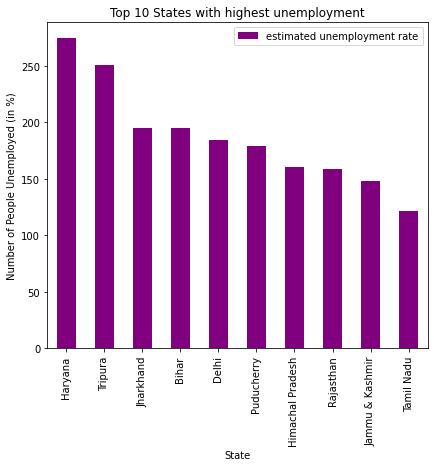

In [114]:
#visulaization

fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
sta_unemp[:10].plot(kind="bar",color="purple",figsize=(15,6),ax=ax0)
ax0.set_title("Top 10 States with highest unemployment")
ax0.set_xlabel("State")
ax0.set_ylabel("Number of People Unemployed (in %)")

In [115]:
#top region with highest unemployment

reg_unemp = df[["region","estimated unemployment rate"]].groupby("region").sum().sort_values(by="estimated unemployment rate", ascending  =False)
reg_unemp.head(10)

,estimated unemployment rate
region,
North,1255.28
South,627.28
East,556.64
Northeast,416.11
West,411.95


Text(0, 0.5, 'Number of People Unemployed (in %)')

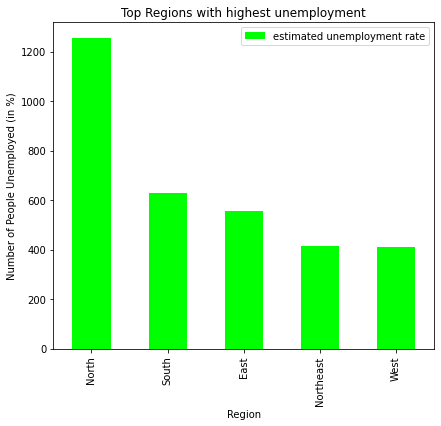

In [116]:
#visulaization
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
reg_unemp[:10].plot(kind="bar",color="lime",figsize=(15,6),ax=ax0)
ax0.set_title("Top Regions with highest unemployment")
ax0.set_xlabel("Region")
ax0.set_ylabel("Number of People Unemployed (in %)")

In [117]:
# months with highest unemployment

mn_unemp = df[["month","estimated unemployment rate"]].groupby("month").sum().sort_values(by="estimated unemployment rate", ascending  =False)
mn_unemp.head(10)

,estimated unemployment rate
month,
May,627.60
Apr,578.14
Jun,294.60
Mar,291.13
Aug,278.46
Jul,265.53
Feb,240.92
Jan,239.11
Sep,235.06


Text(0, 0.5, 'Number of People Unemployed (in %)')

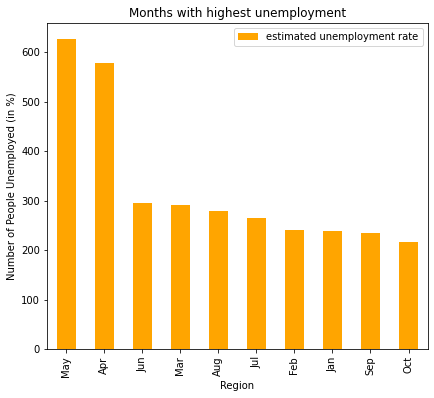

In [118]:
#visulaization
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
mn_unemp[:10].plot(kind="bar",color="orange",figsize=(15,6),ax=ax0)
ax0.set_title("Months with highest unemployment")
ax0.set_xlabel("Region")
ax0.set_ylabel("Number of People Unemployed (in %)")

In [119]:
# To visulize labour participation rate & unemployment rate in each month


IND =  df.groupby(["month"])[['estimated unemployment rate', "estimated employed", "estimated labour participation rate"]].mean()
IND = pd.DataFrame(IND).reset_index()
month = IND.month
unemployment_rate = IND["estimated unemployment rate"]
labour_participation_rate = IND["estimated labour participation rate"]

fig = go.Figure()

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name= "Labour Participation Rate"))

fig.update_layout(title="Uneployment Rate and Labour Participation Rate",
                  xaxis={"categoryorder":"array", "categoryarray":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]})

fig.show()

Text(0, 0.5, 'Number of People Employed (in %)')

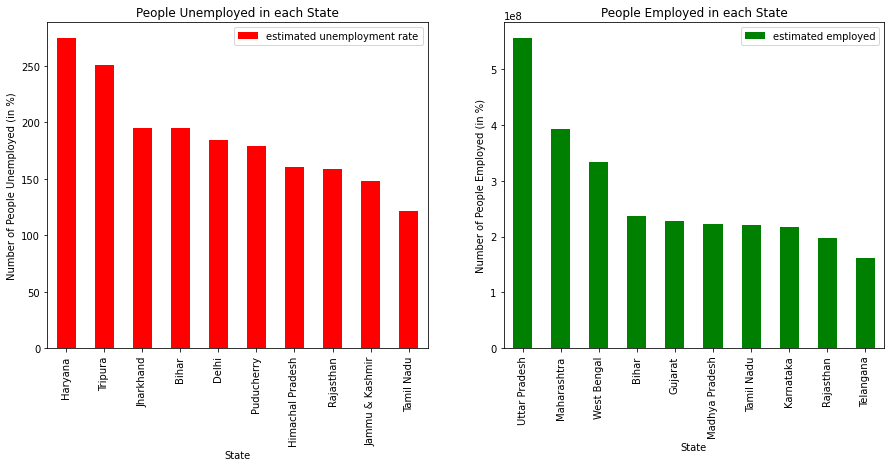

In [120]:
# State wise rate of unemplyement

sta_emp = df[["state","estimated employed"]].groupby("state").sum().sort_values(by="estimated employed", ascending =False)
sta_emp.head(10)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Unemployed
sta_unemp[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Unemployed in each State")
ax0.set_xlabel("State")
ax0.set_ylabel("Number of People Unemployed (in %)")

#Employed
sta_emp[:10].plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Employed in each State")
ax1.set_xlabel("State")
ax1.set_ylabel("Number of People Employed (in %)")


Text(0, 0.5, 'Number of People Employed (in %)')

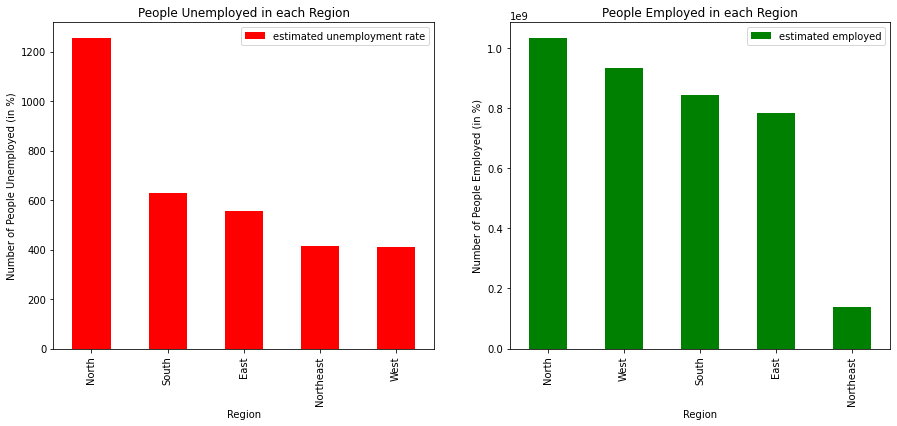

In [121]:
# Region wise rate of unemplyement

reg_emp = df[["region","estimated employed"]].groupby("region").sum().sort_values(by="estimated employed", ascending =False)
reg_emp.head(10)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Unemployed
reg_unemp[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Unemployed in each Region")
ax0.set_xlabel("Region")
ax0.set_ylabel("Number of People Unemployed (in %)")

#Employed
reg_emp[:10].plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Employed in each Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Number of People Employed (in %)")

Text(0, 0.5, 'Number of People Employed (in %)')

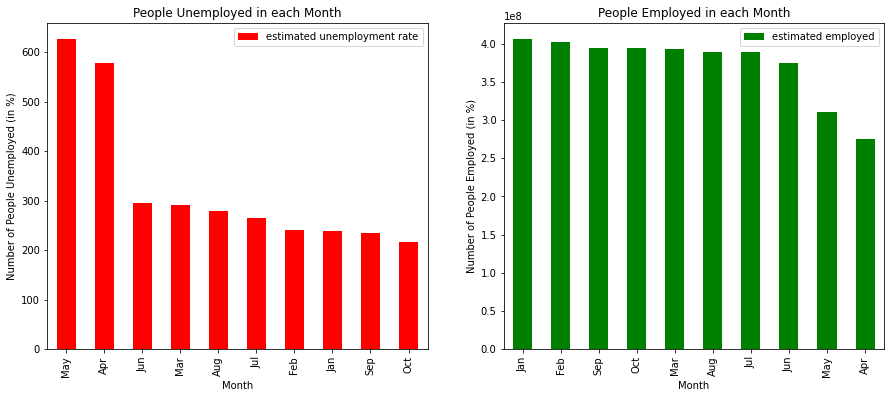

In [122]:
# Month wise rate of unemplyement

mn_emp = df[["month","estimated employed"]].groupby("month").sum().sort_values(by="estimated employed", ascending =False)
mn_emp.head(10)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Unemployed
mn_unemp[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Unemployed in each Month")
ax0.set_xlabel("Month")
ax0.set_ylabel("Number of People Unemployed (in %)")

#Employed
mn_emp[:10].plot(kind="bar",color="green",figsize=(15,6),ax=ax1)
ax1.set_title("People Employed in each Month")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of People Employed (in %)")

In [125]:
# bar plot unemployment rate (monthly)

fig = px.bar(df, x='state',y='estimated unemployment rate', animation_frame = 'month', color='state',
            title='Unemployment rate from Jan 2020 to Oct 2020 (State)')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000

fig.show()

In [127]:
# bar plot unemployment rate (monthly)

fig = px.bar(df, x='region',y='estimated unemployment rate', animation_frame = 'month', color='region',
            title='Unemployment rate from Jan 2020 to Oct 2020 (Region)')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000

fig.show()

## Conclusion

#### state with most unemployment :-  Andhra Pradesh
#### state with least unemployment :-  Sikkim
#### Indian Region with most unemployment :-  North
#### Indian Region with least unemployment :-  Northeast
#### month with highest unemployment :-  March
#### month with least unemployment :-  Januray
#### Higher The labour participation Lower the unemployment rate

# Thank You